In [1]:
import cianparser
import pandas as pd
import time

moscow = cianparser.CianParser(location='Москва')

data = []
for i in range(1, 5):
    a = moscow.get_flats(deal_type='sale', rooms=(1), additional_settings={'start_page': i, 'end_page':i} )
    data.extend(a)
    time.sleep(7)

exel_export = pd.DataFrame(data)
columns = ['author', 'author_type', 'location', 'deal_type', 'accommodation_type', 'floors_count', 'rooms_count', 'total_meters', 'price', 'district', 'street', 'house_number', 'underground', 'residential_complex']
selected_columns = exel_export[columns]
selected_columns.to_csv('c:/Users/Mrsoning/OneDrive/Документы/GitHub/Intensive_one/cian.csv', mode='a', header=False, index=False)


                              Preparing to collect information from pages..
The page from which the collection of information begins: 
 https://cian.ru/cat.php?engine_version=2&p=1&with_neighbors=0&region=1&deal_type=sale&offer_type=flat&room1=1

 1 | 1 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 28. Progress ratio: 100 %. Average price: 114 047 626 rub

The collection of information from the pages with list of offers is completed
Total number of parsed offers: 28. 

                              Preparing to collect information from pages..
The page from which the collection of information begins: 
 https://cian.ru/cat.php?engine_version=2&p=2&with_neighbors=0&region=1&deal_type=sale&offer_type=flat&room1=1

 1 | 2 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 28. Progress ratio: 100 %. Average price: 95 920 269 rub

The collection of information from the pages with lis

In [3]:
import pandas as pd
columns_names = ['author', 'author_type', 'location', 'deal_type', 'accommodation_type', 'floors_count', 'rooms_count', 'total_meters', 'price', 'district', 'street', 'house_number', 'underground', 'residential_complex']
df = pd.read_csv("c:/Users/Mrsoning/OneDrive/Документы/GitHub/Intensive_one/result.csv", on_bad_lines="skip", names=columns_names)
df = df.drop(['residential_complex', 'house_number', 'deal_type', 'street', 'author', 'author_type', 'accommodation_type'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4703 entries, 0 to 4702
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      4703 non-null   object 
 1   floors_count  4703 non-null   int64  
 2   rooms_count   4703 non-null   int64  
 3   total_meters  4703 non-null   float64
 4   price         4628 non-null   float64
 5   district      4538 non-null   object 
 6   underground   4676 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 257.3+ KB


In [4]:
df.columns

Index(['location', 'floors_count', 'rooms_count', 'total_meters', 'price',
       'district', 'underground'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of      location  floors_count  rooms_count  total_meters        price  \
0      Москва            12            5        184.20  456790000.0   
1      Москва            31            5        246.70  289745400.0   
2      Москва             8            5        117.00   58500000.0   
3      Москва            24            5        172.50  207000000.0   
4      Москва             9            5        234.80  125000000.0   
...       ...           ...          ...           ...          ...   
4698   Москва            76            5        303.40  260000000.0   
4699   Москва            57            5        113.89   70019572.0   
4700   Москва            24            5        182.00  145000000.0   
4701   Москва            21            5        214.00  107856000.0   
4702   Москва            20            5        184.08   99400000.0   

                 district     underground  
0               Хамовники     Фрунзенская  
1     Очаково-Матвеевское  

In [6]:
df.describe()

,floors_count,rooms_count,total_meters,price
count,4703.000000,4703.0,4703.000000,4.628000e+03
mean,19.172230,5.0,213.797857,2.675252e+08
std,15.987544,0.0,88.638833,3.341093e+08
min,2.000000,5.0,83.000000,8.030000e+06
25%,8.000000,5.0,151.400000,7.778400e+07
50%,15.000000,5.0,200.000000,1.650000e+08
75%,22.000000,5.0,255.700000,2.940000e+08
max,85.000000,5.0,663.000000,2.361200e+09


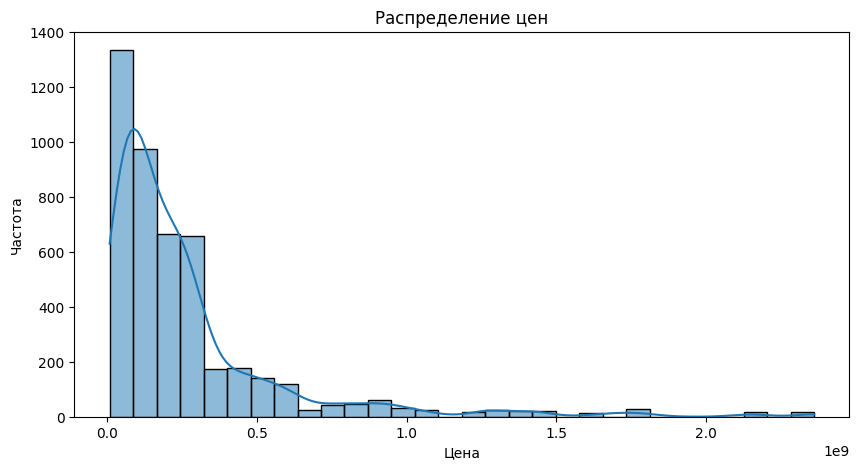

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

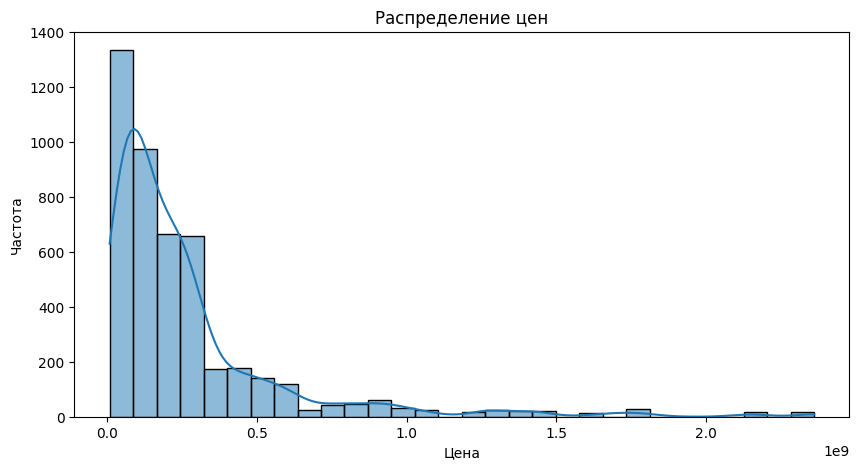

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

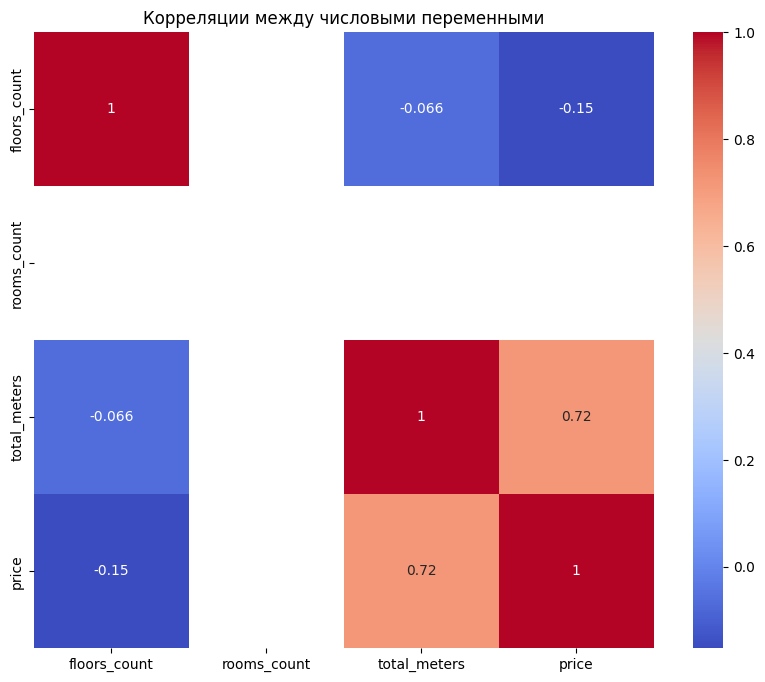

In [9]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляции между числовыми переменными')
plt.show()

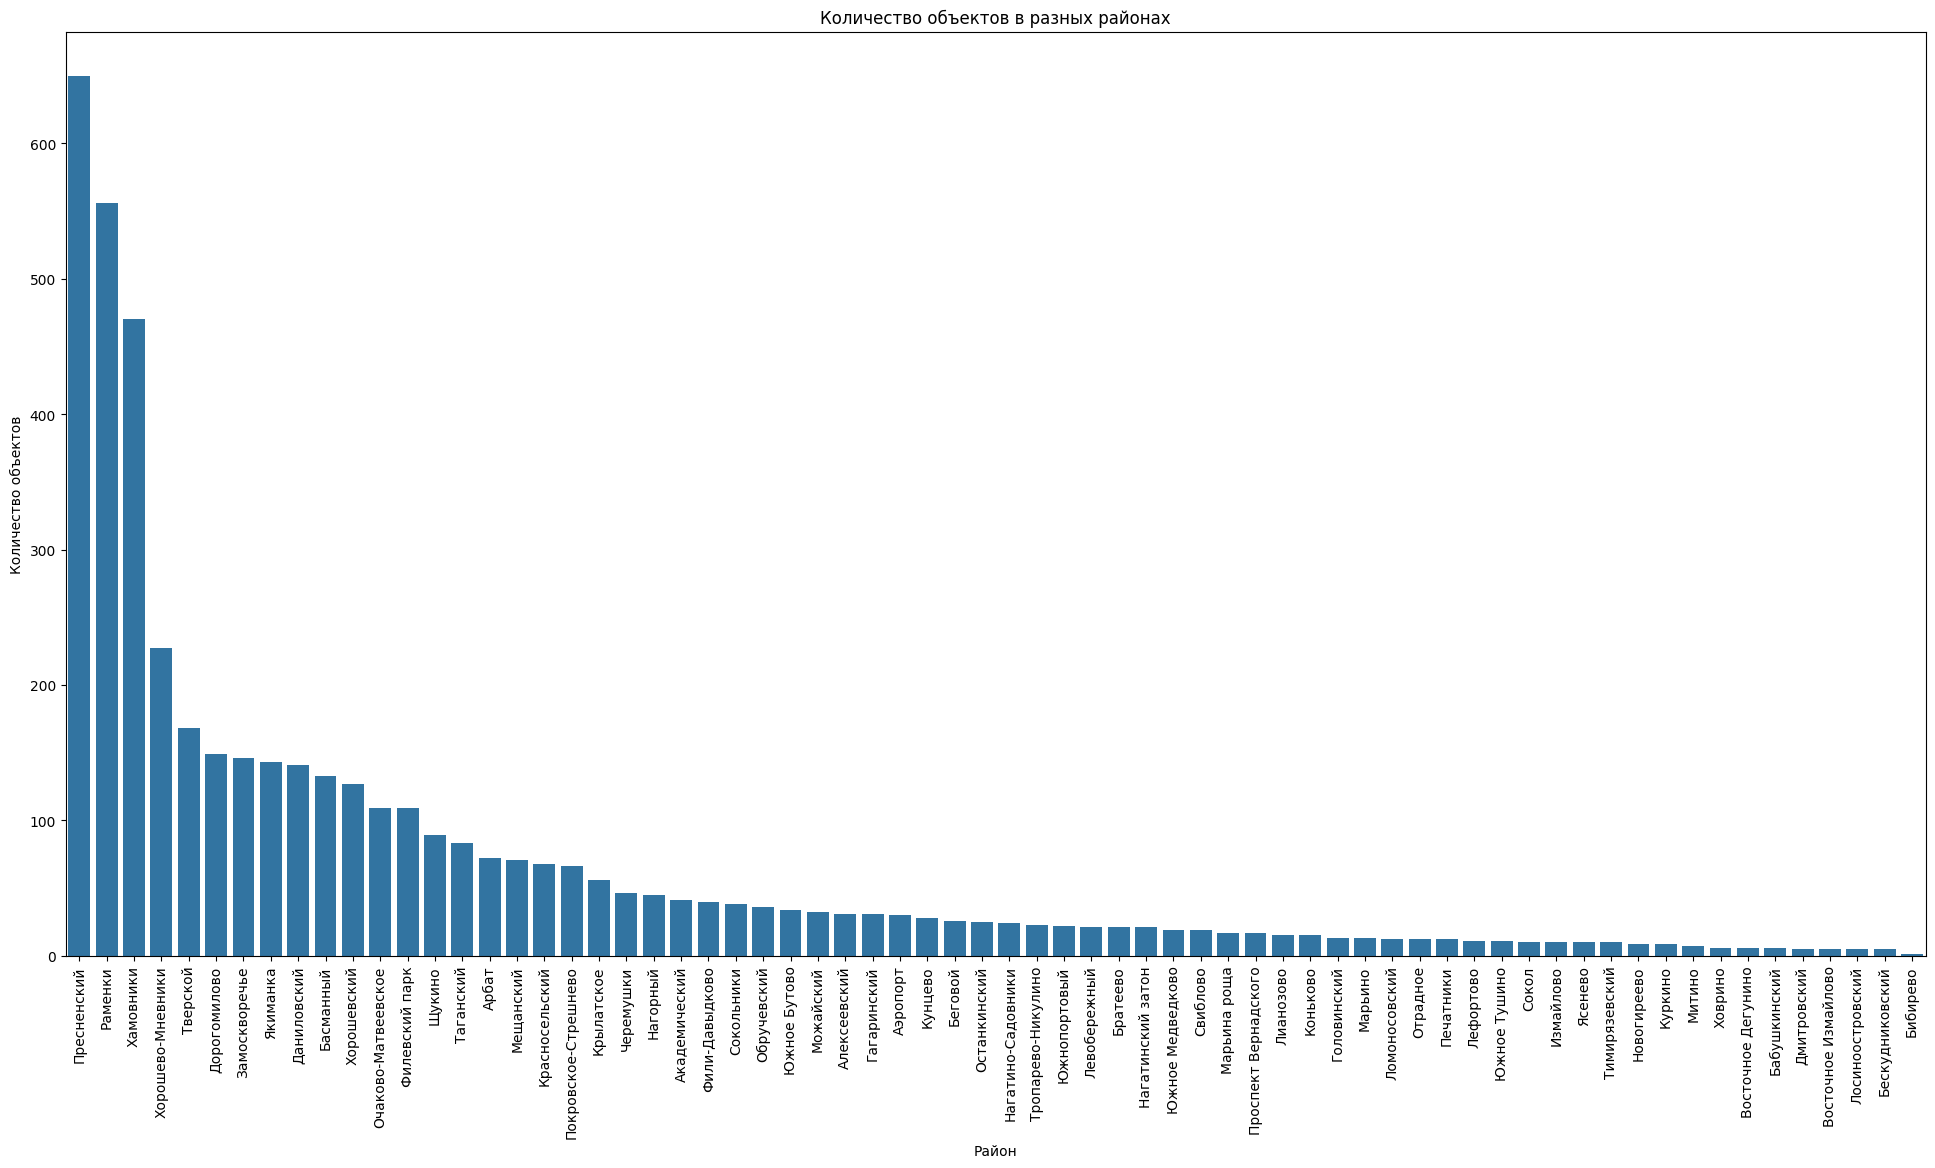

In [10]:
plt.figure(figsize=(24, 12))
sns.countplot(data=df, x='district', order=df['district'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Количество объектов в разных районах')
plt.xlabel('Район')
plt.ylabel('Количество объектов')
plt.show()

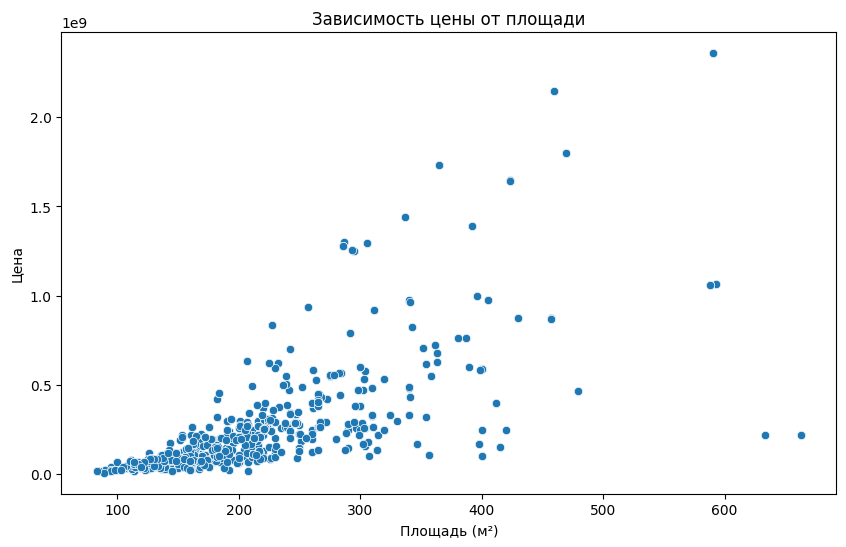

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_meters', y='price')
plt.title('Зависимость цены от площади')
plt.xlabel('Площадь (м²)')
plt.ylabel('Цена')
plt.show()

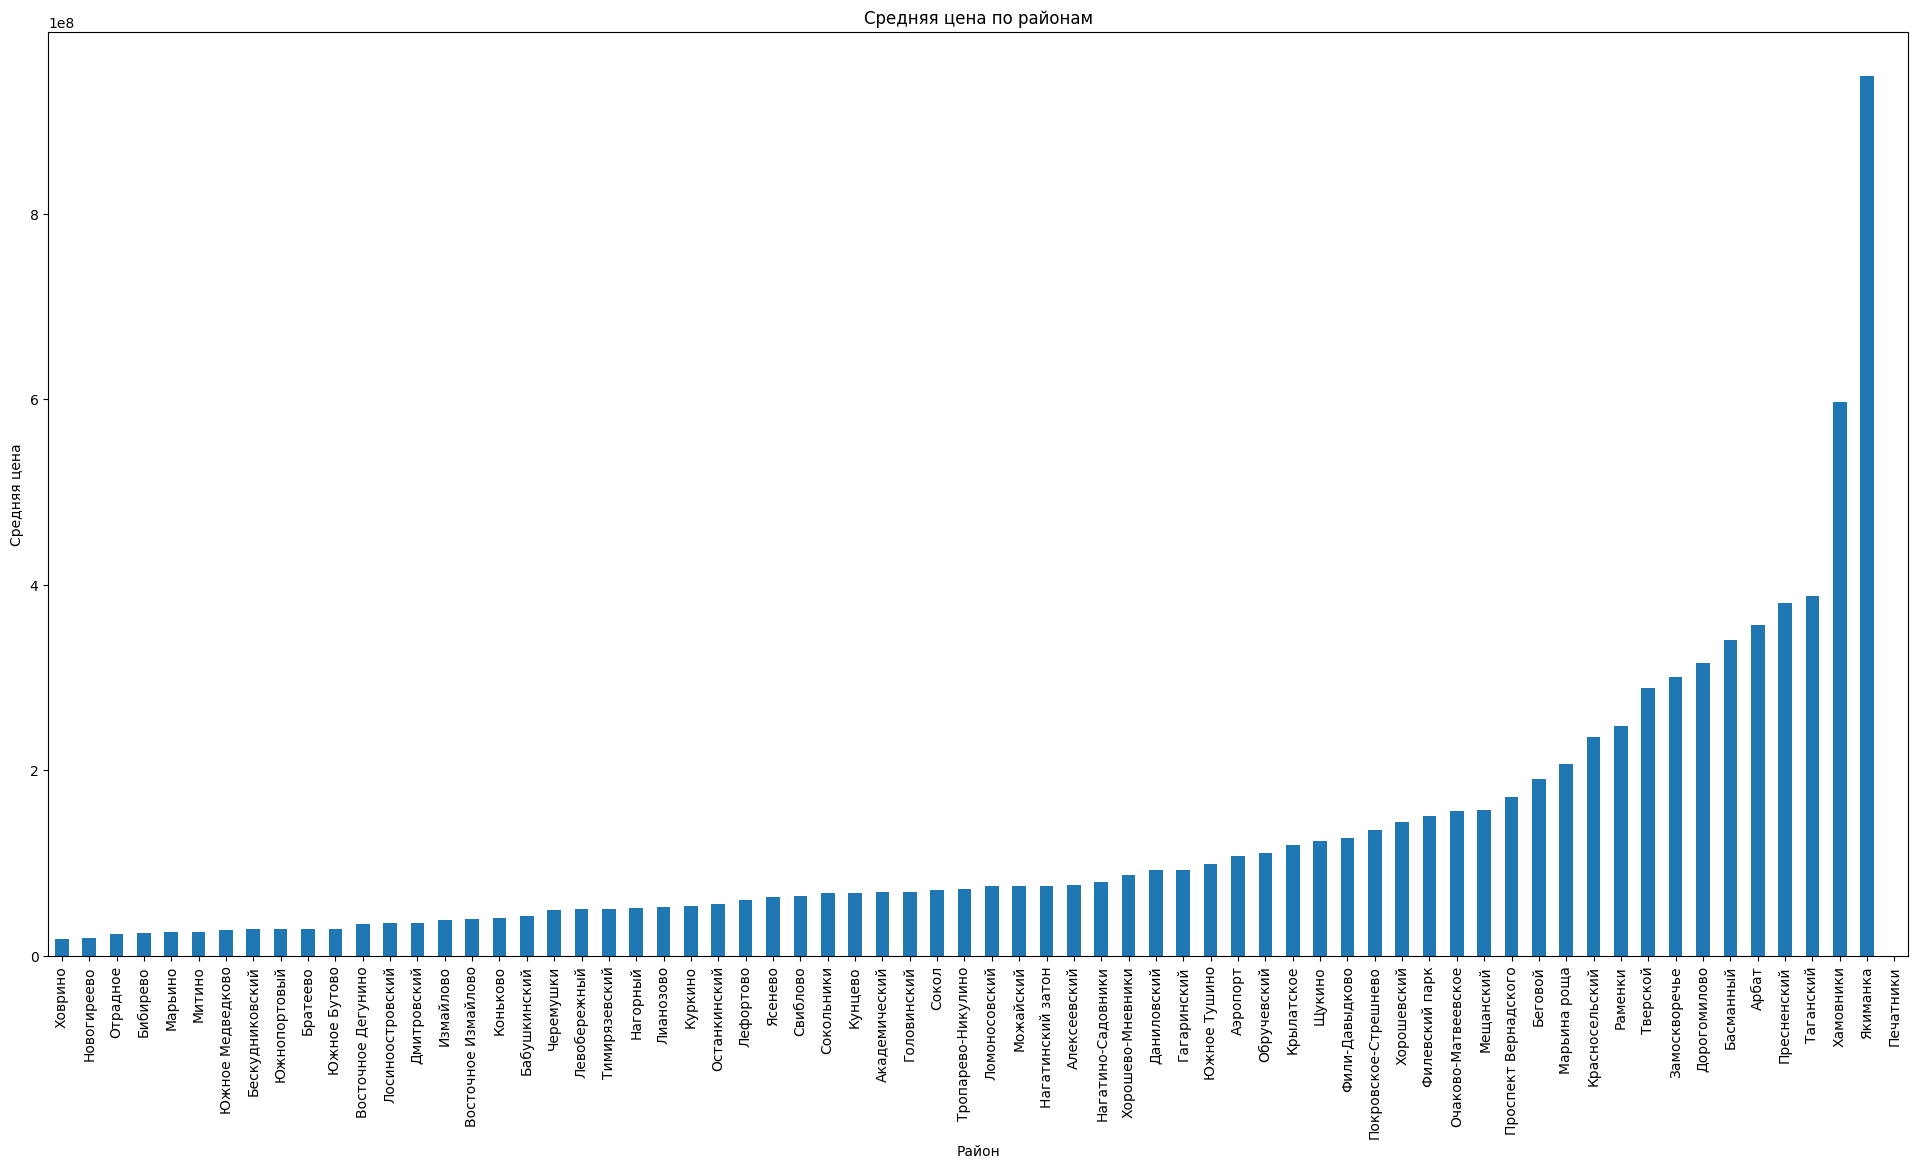

In [12]:
avg_price_per_district = df.groupby('district')['price'].mean().sort_values()
plt.figure(figsize=(24, 12))
avg_price_per_district.plot(kind='bar')
plt.title('Средняя цена по районам')
plt.xlabel('Район')
plt.ylabel('Средняя цена')
plt.show()